# Intro to Regression with Tensorflow & Keras

**OBJECTIVES**

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save and reuse the model

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import h5py
from sklearn.metrics import explained_variance_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [25]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

### Part 1

Load the california housing data and create a dataframe called `cali_df` below.  Make sure to add the target feature and name this `price`. 

In [26]:
X = pd.DataFrame(cali.data, columns=cali.feature_names)
y = pd.DataFrame(cali.target)

In [27]:
X = pd.DataFrame(cali.data, columns=cali.feature_names)
y = pd.DataFrame(cali.target)
y.columns = ['price']

In [28]:
# Let's keep everything in one df for easy access
cali_df = pd.concat([X, y], axis=1)
cali_df.shape

(20640, 9)

In [29]:
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Part 2

Create a train/test split using some of the features in your X and setting y to be the `price` column.

In [30]:
X = cali_df.drop(['price'], axis=1)
y = cali_df['price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a relu activation for the hidden layer.

In [33]:
model = Sequential()
model.add(Dense(24, 
                input_shape=(8,),
                activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1))

### Part 3 - continued

Set up the compilation of the network.  Use an adam optimizer and appropriate loss function with the mean squared error metric.

In [34]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

### Part 4

Fit the model on the training data with 100 epochs (and sequester the output with `verbose = 0`). Save the fit model to the variable `history`.

In [35]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), 
          epochs=100, batch_size=512, verbose=0);

### Part 5

Use `matplotlib` to plot the training loss and validation loss, and the training mean squared error alongside the validation data.  Side by side subplots please.

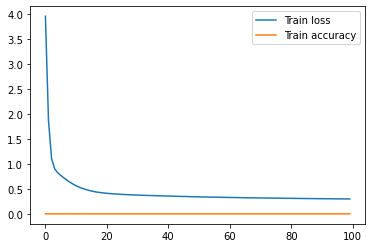

In [36]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.legend();

### Part 6

Let's make a second network that is a bit deeper and more complex. Also, let's now use all the features and see if we help the model.  Use 3 layers, with 64, 128, and 64 nodes respectively in the hidden layers and a `relu` activation function.

In [37]:
model = Sequential()
model.add(Dense(64, 
                input_shape=(8,),
                activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64))

### Part 7

Add a `BatchNormalization` layer prior to our first dense layer in the network above and repeat the fit.

In [38]:
from tensorflow.keras.layers import Dense, BatchNormalization

model = Sequential()
model.add(Dense(64, 
                input_shape=(8,),
                activation='relu'))
BatchNormalization(),
model.add(Dense(128, activation='relu'))
BatchNormalization(),
model.add(Dense(64))

In [39]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [40]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), 
          epochs=100, batch_size=512, verbose=0);

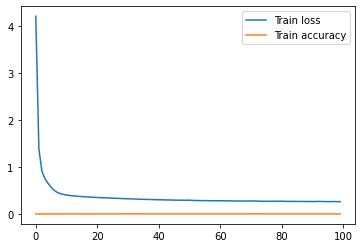

In [41]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.legend();

##### Does this change anything?

Answer: Yes it has change. As shown in the figure the train lose higher with the values lower than about 15. 

### Part 8

Early Stopping.  It seems that we may not need all 100 epochs to train the data.  Include an `EarlyStopping` callback in your model from above.  Set the `patience` equal to 5.  How many epochs do you think are appropriate?

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(64, 
                input_shape=(8,),
                activation='relu'))
BatchNormalization(),
model.add(Dense(128, activation='relu'))
BatchNormalization(),
model.add(Dense(64))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, 
                           verbose=1, mode='auto')

history= model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=None,
    callbacks=[early_stop]
)

Epoch 1/100
484/484 [==============================] - 0s 698us/step - loss: 307.9182 - accuracy: 0.0000e+00 - val_loss: 4.1016 - val_accuracy: 0.0000e+00
Epoch 2/100
484/484 [==============================] - 0s 588us/step - loss: 4.1370 - accuracy: 2.5840e-04 - val_loss: 1.5793 - val_accuracy: 0.0000e+00
Epoch 3/100
484/484 [==============================] - 0s 620us/step - loss: 2.2794 - accuracy: 1.2920e-04 - val_loss: 1.4628 - val_accuracy: 0.0000e+00
Epoch 4/100
484/484 [==============================] - 0s 620us/step - loss: 2.9399 - accuracy: 1.9380e-04 - val_loss: 1.8478 - val_accuracy: 0.0000e+00
Epoch 5/100
484/484 [==============================] - 0s 588us/step - loss: 3.0762 - accuracy: 1.9380e-04 - val_loss: 5.0029 - val_accuracy: 3.8760e-04
Epoch 6/100
484/484 [==============================] - 0s 620us/step - loss: 10.0684 - accuracy: 1.9380e-04 - val_loss: 2.4464 - val_accuracy: 0.0000e+00
Epoch 7/100
484/484 [==============================] - 0s 621us/step - loss: 1.

Answer: The results confirmed the number of Epoch to be 16.

### Part 9

Adding `Dropout`.  Let's add a 5% dropout to the second layer, and a 20% dropout to the third layer and see if we end up stopping sooner or performing better.

In [43]:
from tensorflow.keras.layers import Dropout
model_dp= Sequential()
model_dp.add(Dense(64, 
                input_shape=(8,),
                activation='relu'))
model_dp.add(Dropout(0.05)),
model_dp.add(Dense(128, activation='relu'))
model_dp.add(Dropout(0.2)),
model_dp.add(Dense(64))

model_dp.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


history_dp = model_dp.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=None
)

Epoch 1/100
484/484 [==============================] - 0s 891us/step - loss: 525.1614 - accuracy: 0.0000e+00 - val_loss: 2.6767 - val_accuracy: 0.0000e+00
Epoch 2/100
484/484 [==============================] - 0s 796us/step - loss: 3.1112 - accuracy: 6.4599e-05 - val_loss: 1.9804 - val_accuracy: 0.0000e+00
Epoch 3/100
484/484 [==============================] - 0s 793us/step - loss: 2.2041 - accuracy: 1.2920e-04 - val_loss: 1.3189 - val_accuracy: 0.0000e+00
Epoch 4/100
484/484 [==============================] - 0s 800us/step - loss: 1.9348 - accuracy: 0.0000e+00 - val_loss: 1.5152 - val_accuracy: 0.0000e+00
Epoch 5/100
484/484 [==============================] - 0s 790us/step - loss: 1.8201 - accuracy: 1.2920e-04 - val_loss: 1.3200 - val_accuracy: 0.0000e+00
Epoch 6/100
484/484 [==============================] - 0s 791us/step - loss: 1.7857 - accuracy: 0.0000e+00 - val_loss: 1.2776 - val_accuracy: 0.0000e+00
Epoch 7/100
484/484 [==============================] - 0s 796us/step - loss: 1.6

### Part 9 - continued: RMSE vs. Baseline

Compare the model aboves performance to that of the baseline model for the data.

In [44]:
# Baseline of the model.
cali_df['price'].value_counts(normalize = True)

5.00001    0.046754
1.37500    0.005911
1.62500    0.005669
1.12500    0.004990
1.87500    0.004506
             ...   
4.50800    0.000048
0.32900    0.000048
3.10100    0.000048
3.26300    0.000048
2.70400    0.000048
Name: price, Length: 3842, dtype: float64

In [45]:
# RMSE of the model
Baseline = pd.DataFrame({'Real Values':y_train, 'Baseline':y_train.mean()})
Baseline.head()

,Real Values,Baseline
8158,2.285,2.070349
18368,2.799,2.070349
19197,1.830,2.070349
3746,4.658,2.070349
13073,1.500,2.070349


In [46]:
mean_squared_error(y_train, Baseline['Baseline'])**0.5

1.1551254785988831

### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  Feed a model that is identical to the one above including dropout and include `l2` regularization in each of the dense layers of 0.01.  What is the RMSE of this model?  How does it compare to the baseline?

In [ ]:
from tensorflow.keras.regularizers import l2
model_l2= Sequential()
model_l2.add(Dense(64, 
                input_shape=(8,),
                activation='relu', kernel_regularizer=l2(0.01))),
model_l2.add(Dense(128, activation='relu',  kernel_regularizer=l2(0.01)))

model_l2.add(Dense(64))

model_l2.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history_l2 = model_l2.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=None
)

Epoch 1/100


### Part 11: Saving the Model

Save the model as `cali_housing.h5`.  

In [ ]:
model_l2.save('cali_housing.h5')